In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('aug_train.csv')

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?</br>
(min/mean/median/max/unique/top/freq)

In [4]:
#Basic information about the dataset
print("Basic information about the dataset")
print(df.info())

#Summary statistics
print("\nSummary Statistics")
print(df.describe())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes:

In [6]:
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level','major_discipline','company_size', 
        'company_type','last_new_job']
nums = ['enrollee_id','city_development_index','experience','training_hours','target']

print(df[cats].describe())
print("\n", df[nums].describe())

            city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline company_size company_type last_new_job  
count            18698            16345        13220        13018        18735  
unique               5                6            8            6            6  
top           Graduate             STEM        50-99      Pvt Ltd            1  
freq             11598            14492         3083         9817         8040  

         enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     96

## 1. Descriptive Statistics (Kesimpulan)

A. Semua tipe data sudah sesuai </br>
B. Kolom <b> gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new job, dan training_hours</b> memiliki nilai kosong </br>
C. Kolom gender yang seharusnya memiliki 2 nilai unik ternyata memiliki 3 nilai unik.

## 2. Univariate Analysis

Gunakan <b>visualisasi</b> untuk melihat distribusi masing-masing kolom (feature maupun target).</br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik</br> (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).</br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [12]:
df[df['gender']=='Male'].count()/len(df['gender'])

enrollee_id               0.690103
city                      0.690103
city_development_index    0.690103
gender                    0.690103
relevent_experience       0.690103
enrolled_university       0.680708
education_level           0.677472
major_discipline          0.593486
experience                0.689477
company_size              0.486637
company_type              0.481835
last_new_job              0.686554
training_hours            0.690103
target                    0.690103
dtype: float64

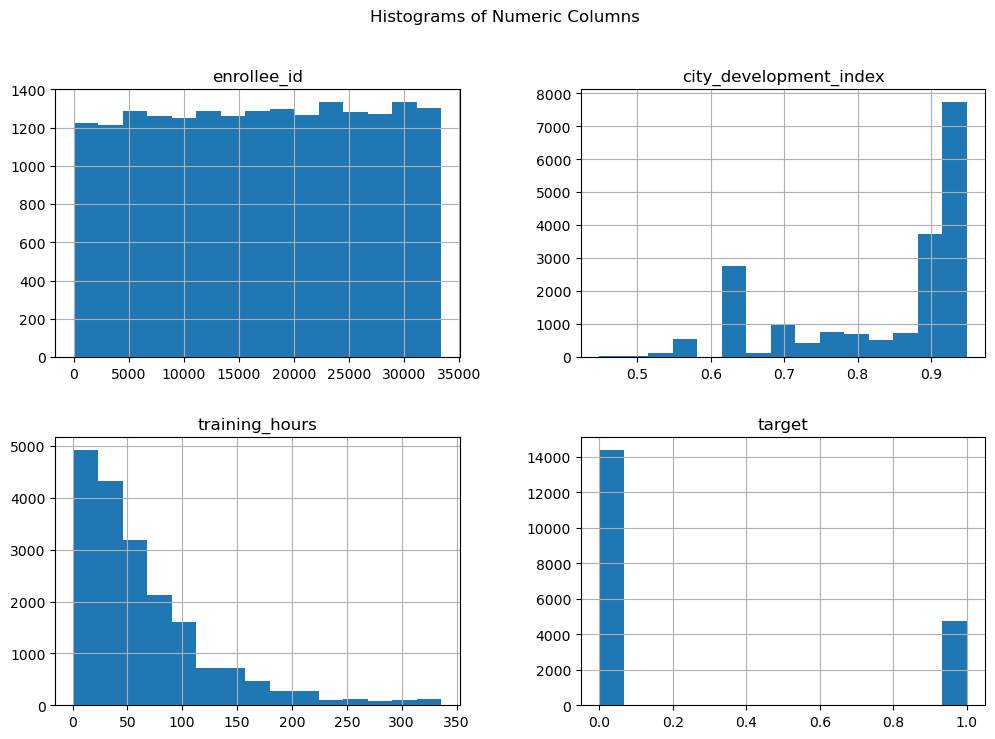

In [10]:
#Create histograms for numeric columns
df[nums].hist(bins=15, figsize=(12,8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

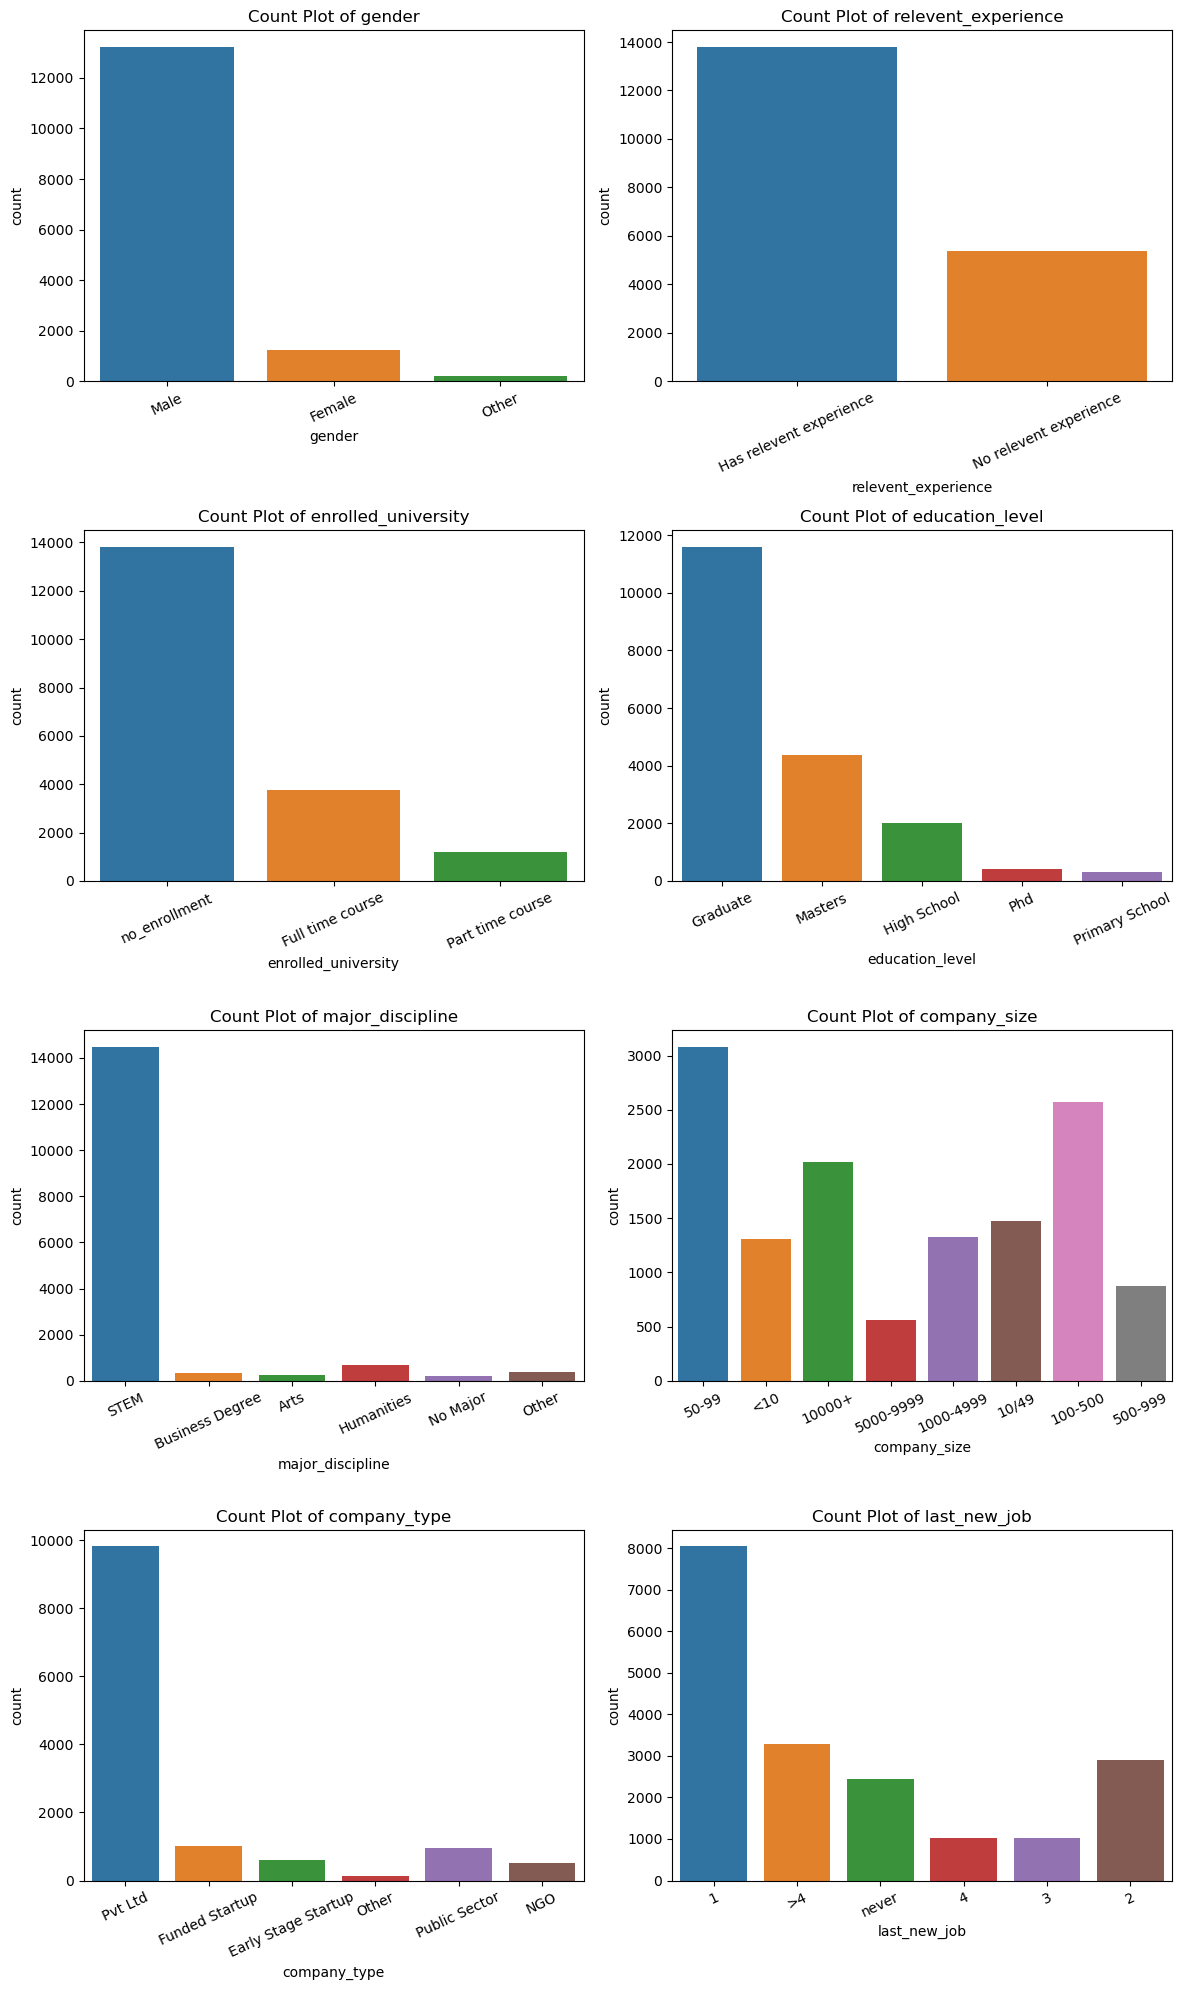

In [7]:
cats1=['gender','relevent_experience', 'enrolled_university', 'education_level','major_discipline','company_size', 'company_type','last_new_job']
plt.figure(figsize=(12,20))
for i, col in enumerate(cats1, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

## 2. Univariate Analysis (Kesimpulan)

#### Hasil observasi:
1. Data didominasi oleh karyawan pria</br>
2. </br>

#### Follow up untuk data preprocessing:
1.</br>
2.</br>.

<Figure size 1200x2000 with 0 Axes>

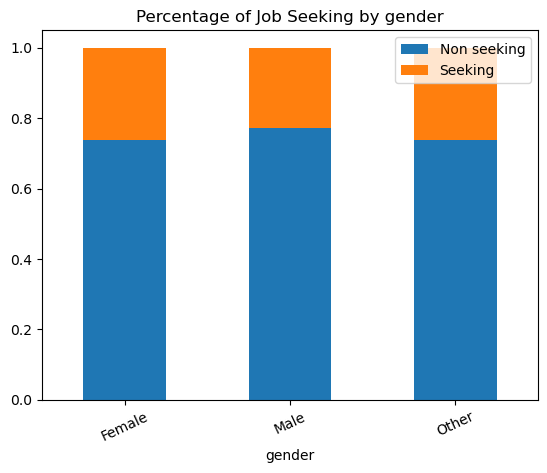

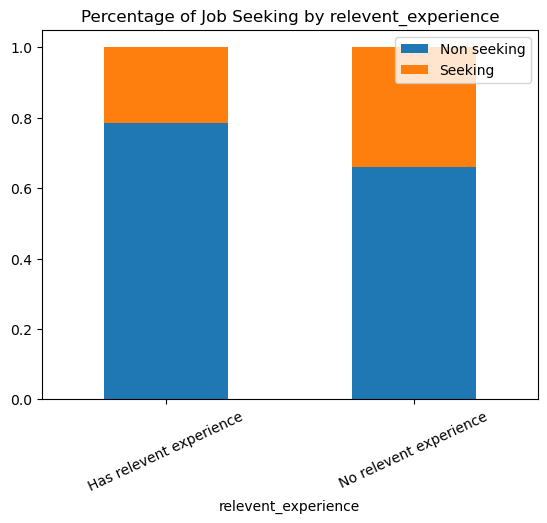

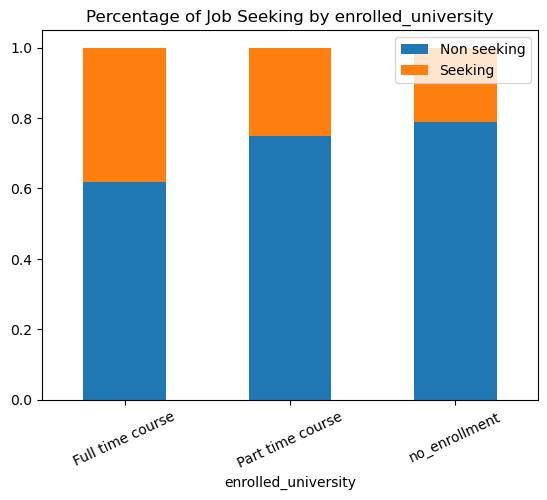

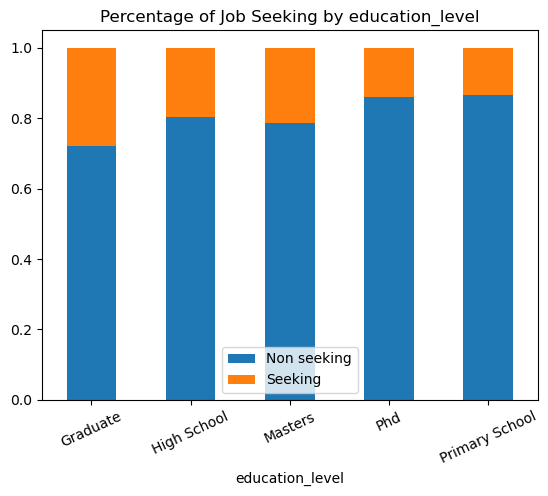

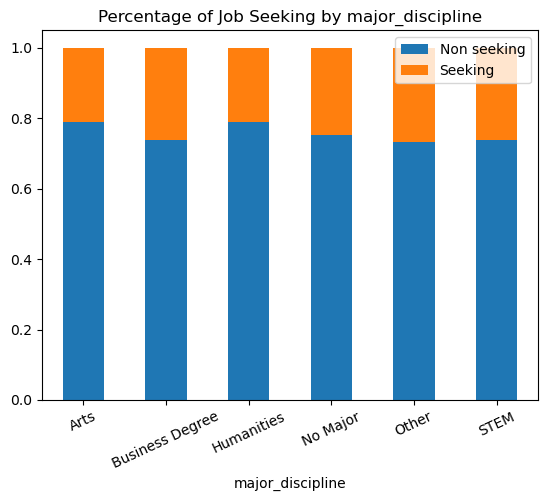

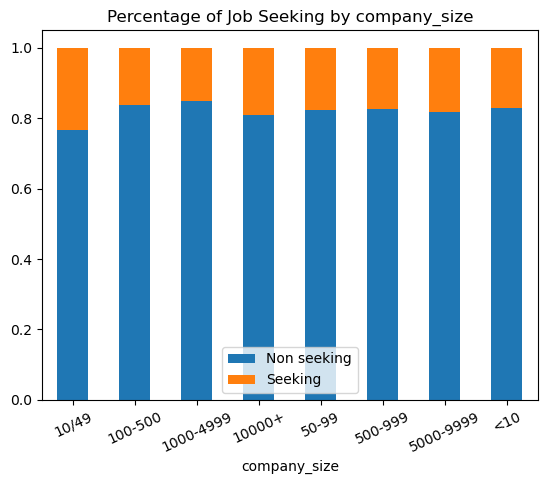

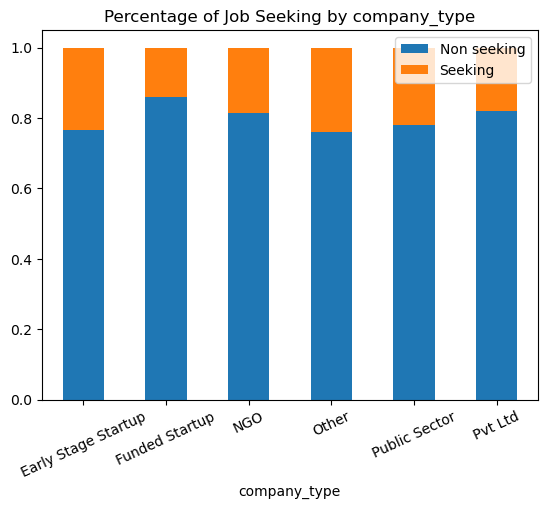

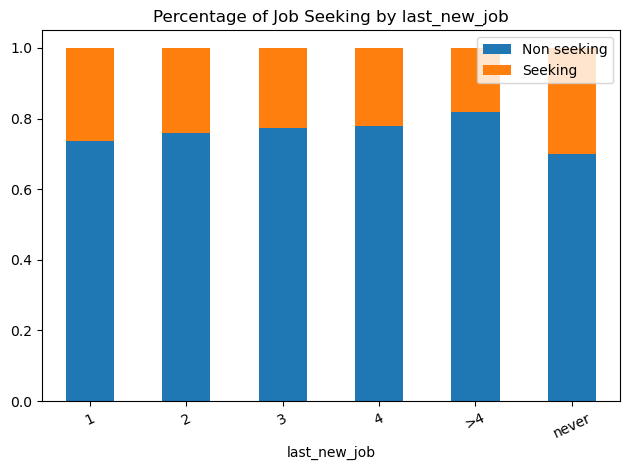

In [64]:
cats1=['gender','relevent_experience', 'enrolled_university', 'education_level','major_discipline','company_size', 'company_type','last_new_job']

plt.figure(figsize=(12,20))
for i, col in enumerate(cats1, 1):
    df.groupby(col)['target'].value_counts(normalize=True).unstack('target').plot.bar(stacked=True)
    plt.title(f'Percentage of Job Seeking by {col}')
    plt.legend(labels=('Non seeking', 'Seeking'))
    plt.xticks(rotation = 25)
    
plt.tight_layout()
plt.show()